# Project 5 - KNN
Γεώργιος Δάλλας ΑΕΜ: 217
# 1. 
In this step, the MNIST dataset is loaded, containing 70k digit [0,9] grayscaled digit  28x28 photos. 60k photos are loaded for train with their labels and 10k for testing.

In [ ]:
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt
import numpy as np
import random as rn
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import accuracy_score
import matplotlib.image 


In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2.
A plot of a random picture for each digit in x_train is plotted. 

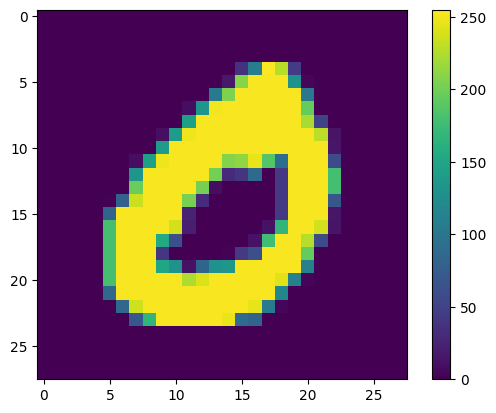

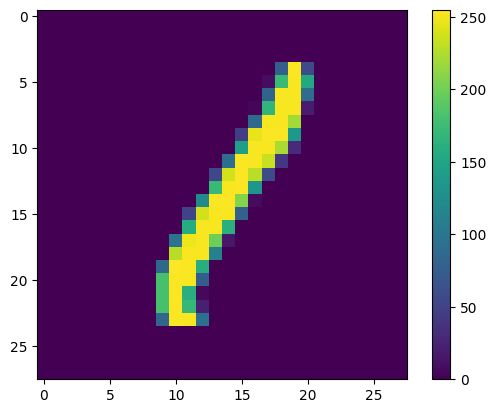

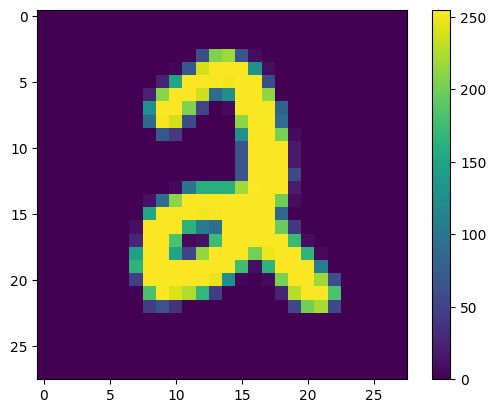

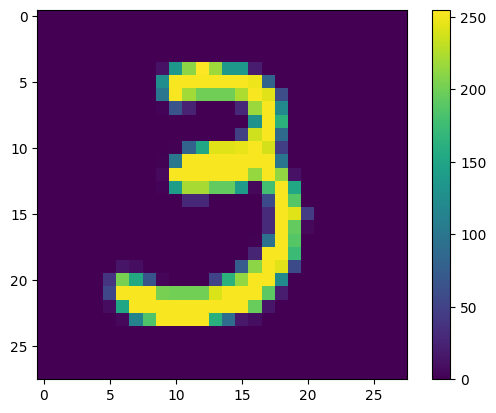

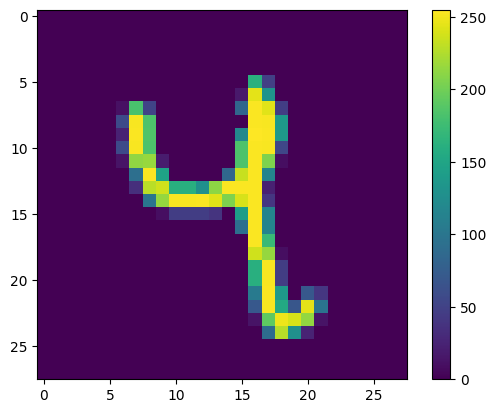

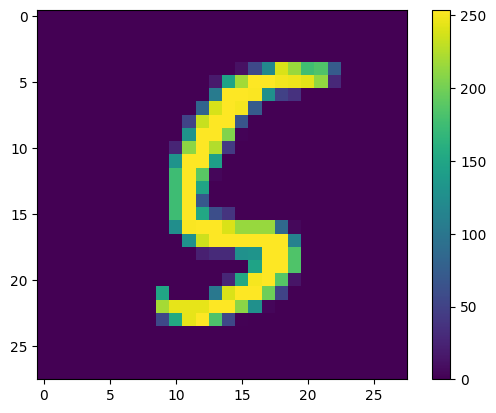

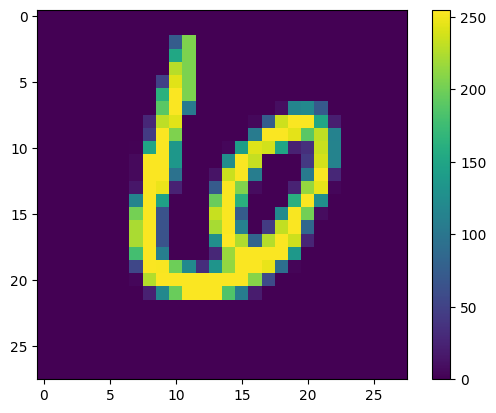

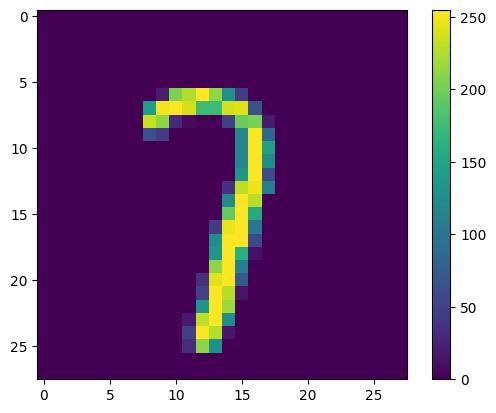

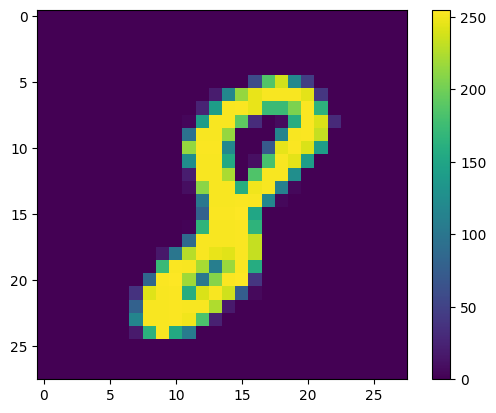

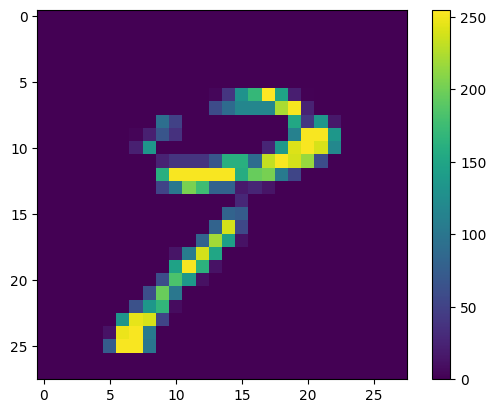

In [48]:
for i in range(10):
    found = False
    while not found:
        j = rn.randint(0, len(y_train) - 1)
        if y_train[j] == i:
            found = True
            img = x_train[j]
            plt.figure()
            plt.imshow(img)
            plt.colorbar()

#imgplot = plt.imshow(img)

# 3.
The height and width of each picture is 28 pixels. Pixel values range from 0 to 255. So the important pixels are the ones having a non zero value for the representation of a digit.

In [49]:

print(img.shape)



(28, 28)


# 4.
On this step, images are reshaped from (samples,28,28) to (samples, 784) so they can be loaded to knn.

In [50]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# 5.
On this step a KNN model is created for n= [5,15,51,int(sqrt(N))]. For all values of n tested, the accuracy both for test and train worsened as n kept increasing

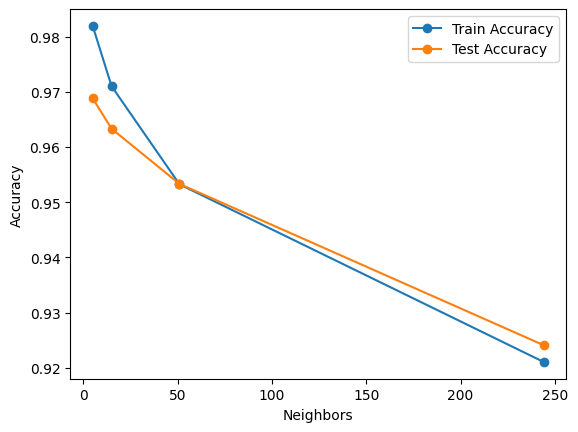

In [51]:
n = [5,15,51,int(math.sqrt(60000))]
acc_train = []
acc_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc_train.append(accuracy_score(y_train, knn.predict(x_train)))
    acc_test.append(accuracy_score(y_test, y_pred))


plt.figure()
plt.plot(n, acc_train, label='Train Accuracy',marker='o')
plt.plot(n, acc_test, label='Test Accuracy',marker='o')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 6.
Here the data is normalized by dividing with 255 so the values of each pixel now are [0,1]. When comparing the results by plotting them, no difference can be seen. Both results on train and on test accuracies are exactly equal.

c:\Users\dalla\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dalla\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\dalla\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\dalla\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\dalla\AppData\Local\Programs\Python\Python310\lib\subp

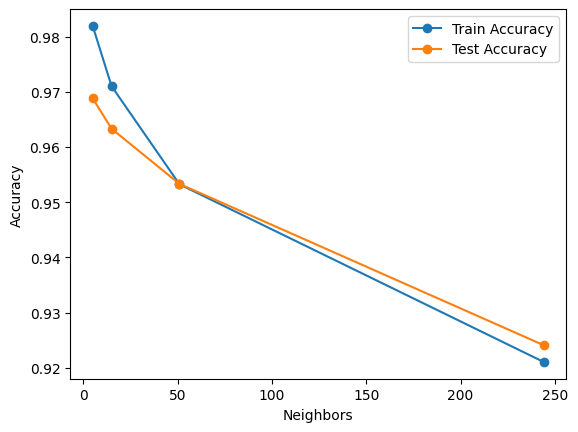

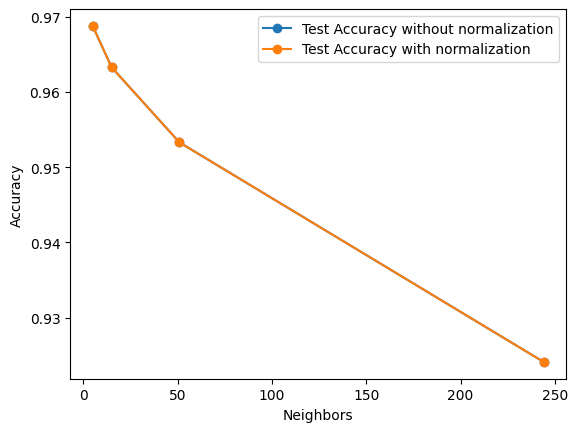

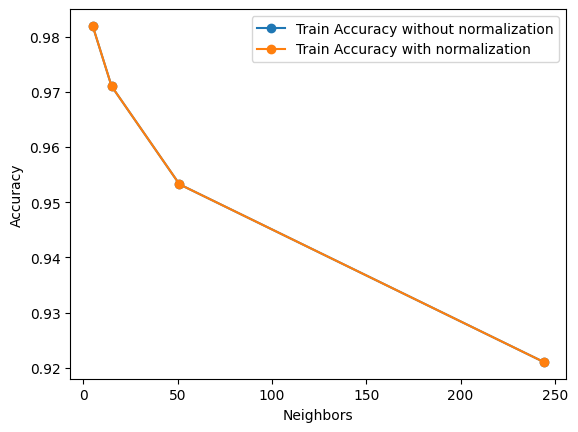

In [52]:
x_train = x_train/255.0
x_test = x_test/255.0
acc_train_norm = []
acc_test_norm = []

for i in n:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc_train_norm.append(accuracy_score(y_train, knn.predict(x_train)))
    acc_test_norm.append(accuracy_score(y_test, y_pred))


plt.figure()
plt.plot(n, acc_train_norm, label='Train Accuracy',marker='o')
plt.plot(n, acc_test_norm, label='Test Accuracy',marker='o')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(n, acc_test, label='Test Accuracy without normalization',marker='o')
plt.plot(n, acc_test_norm, label='Test Accuracy with normalization',marker='o')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(n, acc_train, label='Train Accuracy without normalization',marker='o')
plt.plot(n, acc_train_norm, label='Train Accuracy with normalization',marker='o')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7.
Here, a 28*28 picture of the digit 3 that was drawn in MS Paint is loaded. The shape is 28*28*4. The 4 VALUE here is RGBA. So only 3 out of 4 values where kept since there were no transparency in pixels. Afterwards the mean of Red green and blue is taken to represent a grayscale value of each puxel. The result is a 28*28 pixel grayscale image that is also normalised with values [0,1]. Finally, the image is reshaped to (1,784) to be loaded in the best knn model of step 6. That model was knn with k=5 and accuracy of 0.9688. The model classified the input image correctly as [3].

Test acc without normalization: [0.9688, 0.9633, 0.9533, 0.9241]
Test acc with normalization: [0.9688, 0.9633, 0.9533, 0.9241]
(28, 28, 4)
(28, 28, 3)
(28, 28)


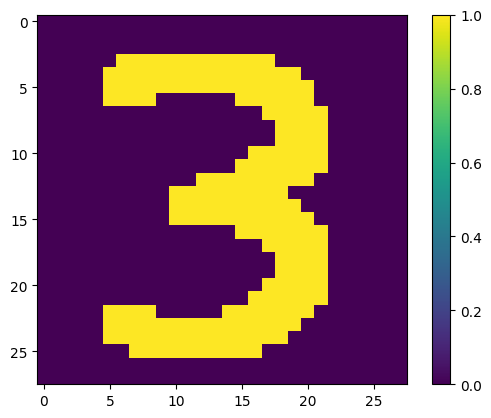

(1, 784)
Predicted digit: [3]
Prediction probabilities for each digit: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:

print("Test acc without normalization:", acc_test)
print("Test acc with normalization:", acc_test_norm) #best one was i=4 so root of N = 60000
img = matplotlib.image.imread("my_digit.png")
print(img.shape)
img = img[:,:,:3]  
print(img.shape)
grayscaled = img.mean(axis=2)
print(grayscaled.shape)
#print(grayscaled)
plt.figure()
plt.imshow(grayscaled)
plt.colorbar()
plt.show()
reshaped = grayscaled.reshape(1, 28 * 28)
#print(reshaped)
print(reshaped.shape)
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(x_train,y_train)
pred = knn.predict(reshaped)
print("Predicted digit:", pred)
